The following is an EDA of a new e-commerce store's website sales data.

In [24]:
# # Importing the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the csv data and exploring the data structure
df = pd.read_csv("ecom_store_payments.csv", low_memory=False)
df.head()

,shopper_id,purchase_at,channel,payment_type,amount_paid,product,state,days_since_registration,transaction_id,Size,Color,Gender,Style,Year,CAC,pLTV,pages_viewed_before_purchase,items_viewed_before_purchase,time_on_site_before_purchase
0,661be8828d,2024-02-14 10:41:04,Stripe,Member,251.99,T shirt,California,6,33434,M,Green,F,Fall Line,2022,126.00,1007.96,20,7,36
1,4005418d62,2024-04-23 5:17:32,Instagram,Member,244.99,T shirt,Oregon,0,85060,XXL,Red,M,Fall Line,2022,81.66,979.96,13,7,35
2,4262bdb142,2024-01-11 13:47:41,Instagram,Member,243.99,T shirt,Oregon,0,7937,XXL,Green,F,Summer Line,2022,81.33,975.96,18,3,81
3,2979236ffa,2024-03-30 12:24:41,Stripe,Member,243.99,T shirt,Oregon,2,68455,XL,Red,F,Fall Line,2024,61.00,975.96,16,4,61
4,85fe5a2260,2024-05-01 11:32:16,Stripe,Member,242.99,T shirt,Oregon,1,90602,M,Green,M,Spring Line,2022,121.50,971.96,5,5,49


In [25]:
# Investigating records for data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40850 entries, 0 to 40849
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   shopper_id                    40850 non-null  object 
 1   purchase_at                   40850 non-null  object 
 2   channel                       40850 non-null  object 
 3   payment_type                  40850 non-null  object 
 4   amount_paid                   40850 non-null  float64
 5   product                       40850 non-null  object 
 6   state                         40850 non-null  object 
 7   days_since_registration       40850 non-null  int64  
 8   transaction_id                40850 non-null  int64  
 9   Size                          40850 non-null  object 
 10  Color                         40850 non-null  object 
 11  Gender                        40850 non-null  object 
 12  Style                         40850 non-null  object 
 13  Y

In [26]:
# Remove receipt column from data
# df = df.drop(['receipt_id'], axis = 1)

# Changing data type from int to string
df['transaction_id'] = str(df['transaction_id'])

# Changing data type from string to int
# df['pLTV'] = df['pLTV'].astype(str).astype(int) #to convert string to integer

# Changing data type to a float
df['pLTV'] = df['pLTV'].astype(float)

# Checking data again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40850 entries, 0 to 40849
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   shopper_id                    40850 non-null  object 
 1   purchase_at                   40850 non-null  object 
 2   channel                       40850 non-null  object 
 3   payment_type                  40850 non-null  object 
 4   amount_paid                   40850 non-null  float64
 5   product                       40850 non-null  object 
 6   state                         40850 non-null  object 
 7   days_since_registration       40850 non-null  int64  
 8   transaction_id                40850 non-null  object 
 9   Size                          40850 non-null  object 
 10  Color                         40850 non-null  object 
 11  Gender                        40850 non-null  object 
 12  Style                         40850 non-null  object 
 13  Y

In [27]:
# Renaming columns so they all share consistent lower case format
df = df.rename(columns={"Size": "size", "Color": "color", "Gender": "gender", 
                        "Style": "style", "Year": "year"})

In [28]:
# Summary stats on numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
amount_paid,40850.0,18.117408,14.904361,-9.99,10.99,14.99,19.99,302.99
days_since_registration,40850.0,1.460122,2.500662,0.00,0.00,0.00,2.00,41.00
year,40850.0,2022.007001,1.414854,2020.00,2021.00,2022.00,2023.00,2024.00
CAC,40850.0,6.533128,5.885271,-2.50,3.33,5.00,7.50,127.00
pLTV,40850.0,63.396952,53.205993,-35.96,35.97,51.96,71.96,1007.96
pages_viewed_before_purchase,40850.0,10.488984,5.780593,1.00,5.00,10.00,15.00,20.00
items_viewed_before_purchase,40850.0,6.965630,3.924605,3.00,4.00,6.00,8.00,20.00
time_on_site_before_purchase,40850.0,53.643084,102.823253,1.00,3.00,4.00,18.00,400.00


In [29]:
# Defining categorical and numerical columns into separate datasets for easy analysis
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['shopper_id', 'purchase_at', 'channel', 'payment_type', 'product',
       'state', 'transaction_id', 'size', 'color', 'gender', 'style'],
      dtype='object')
Numerical Variables:
['amount_paid', 'days_since_registration', 'year', 'CAC', 'pLTV', 'pages_viewed_before_purchase', 'items_viewed_before_purchase', 'time_on_site_before_purchase']


amount_paid
Skew : 4.87


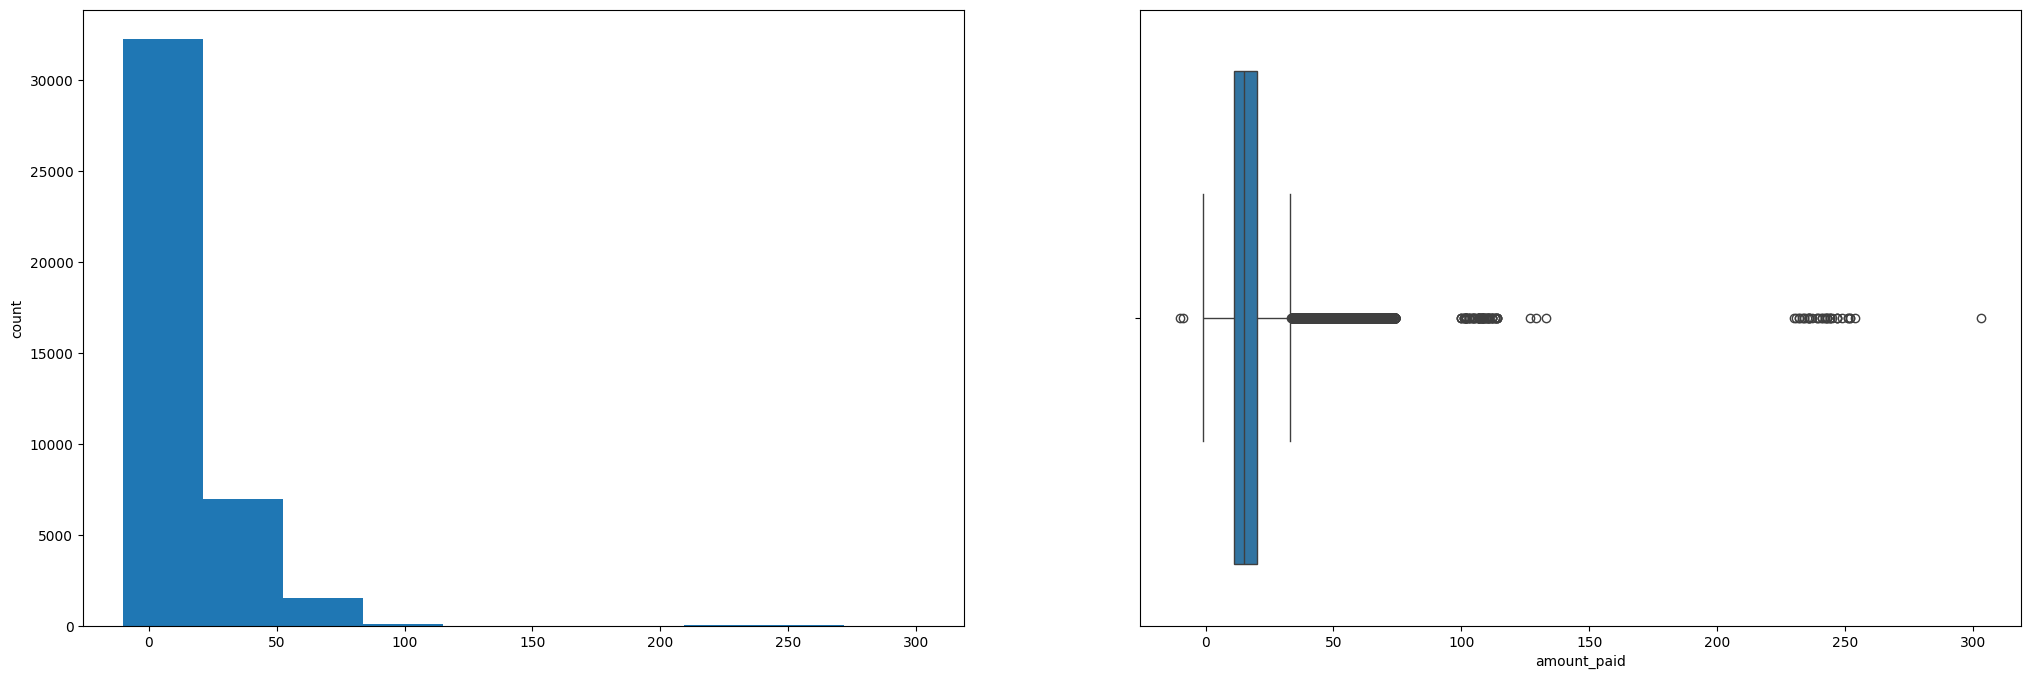

days_since_registration
Skew : 1.6


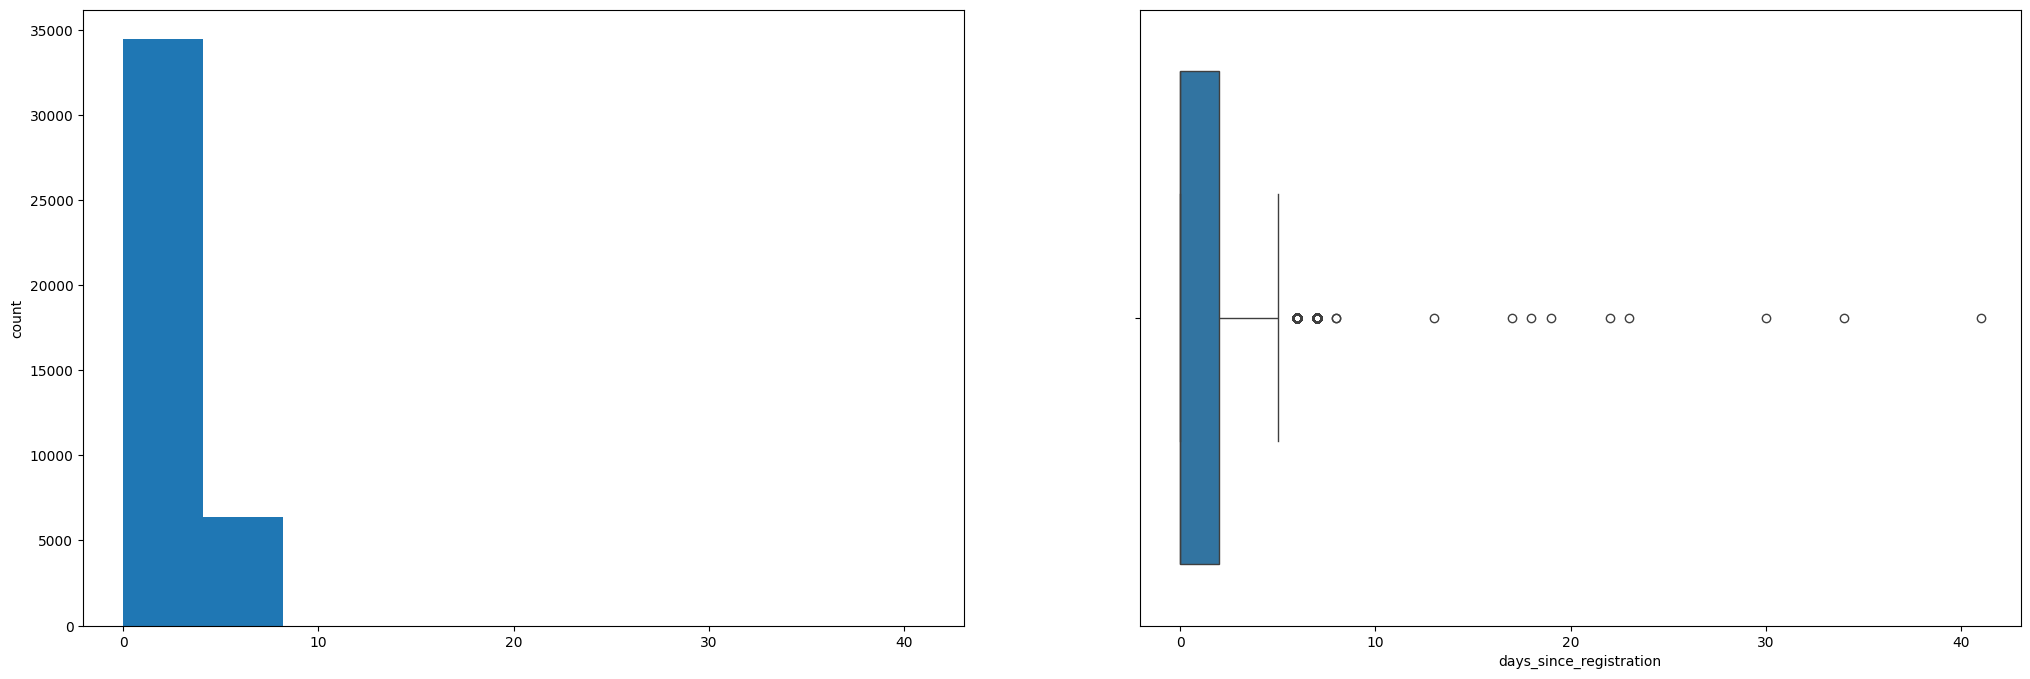

year
Skew : -0.01


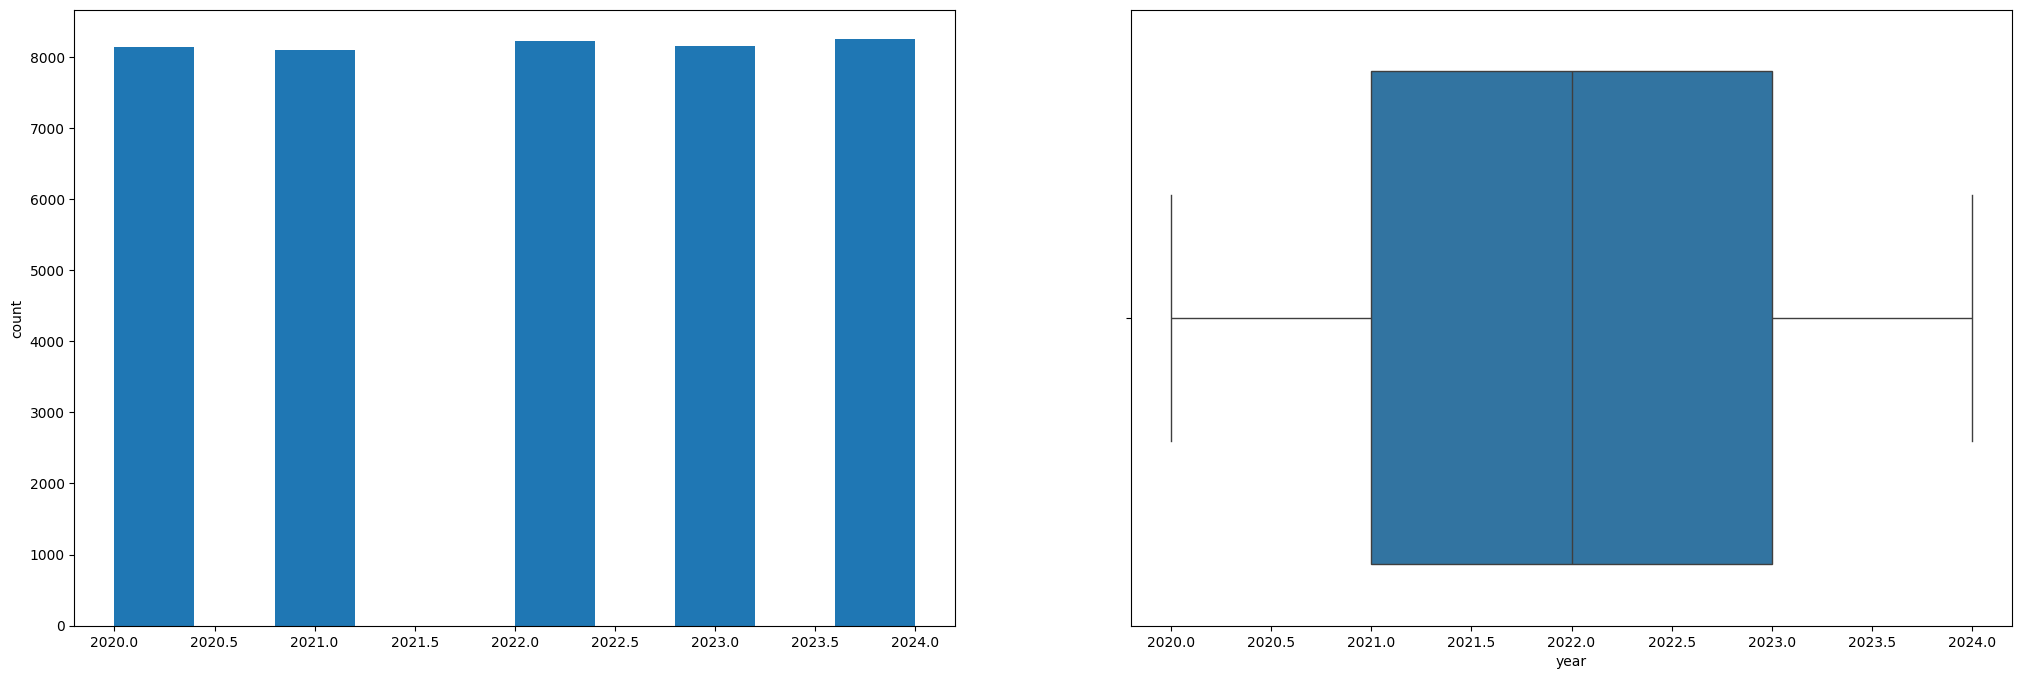

CAC
Skew : 5.2


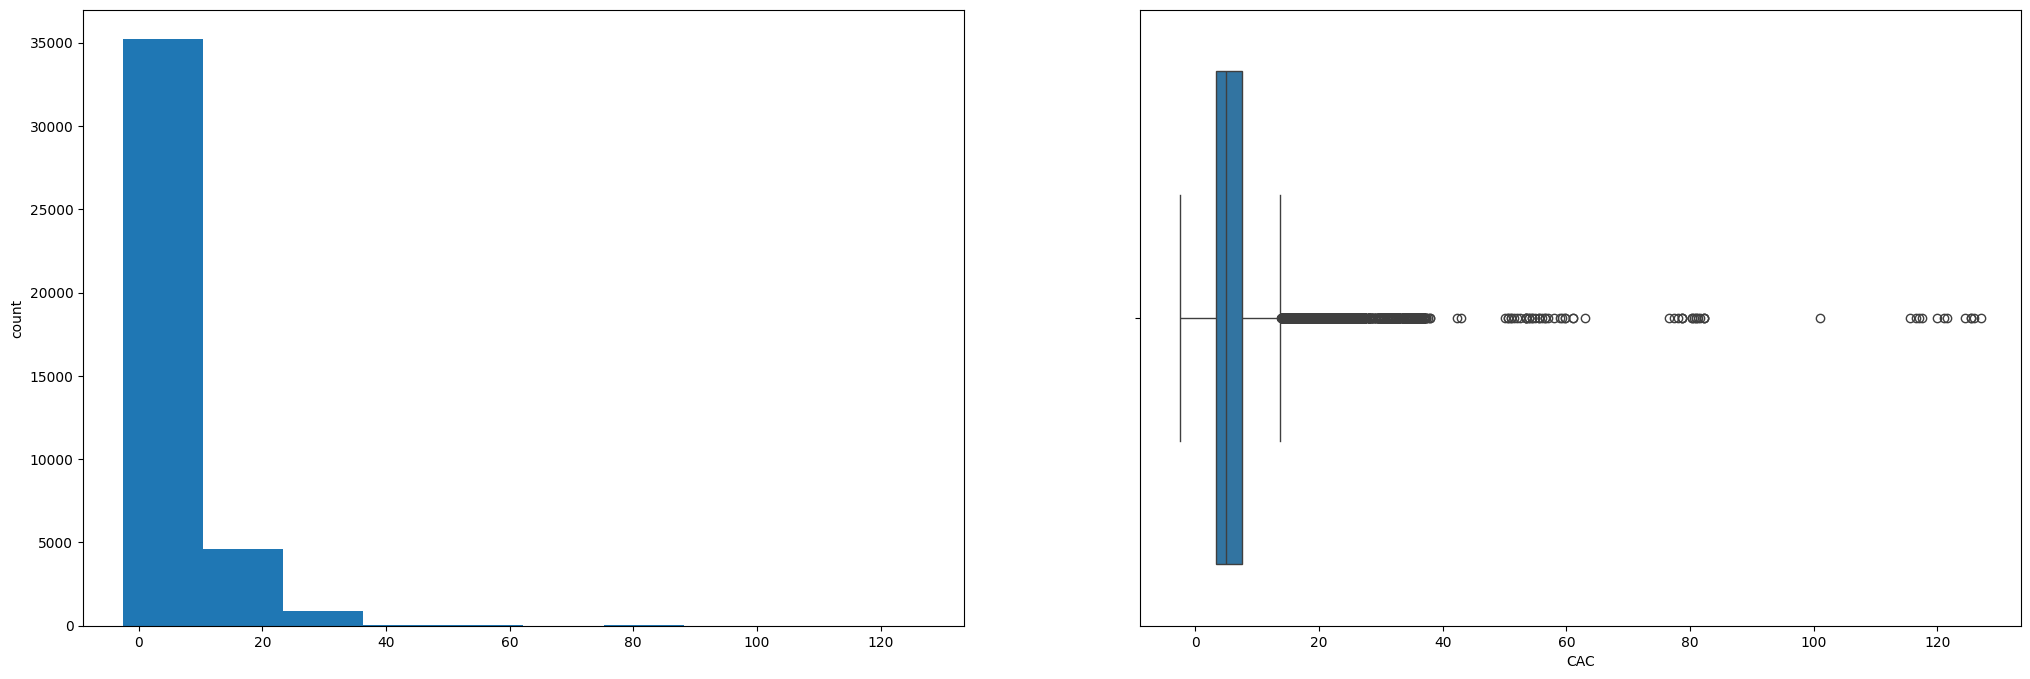

pLTV
Skew : 4.72


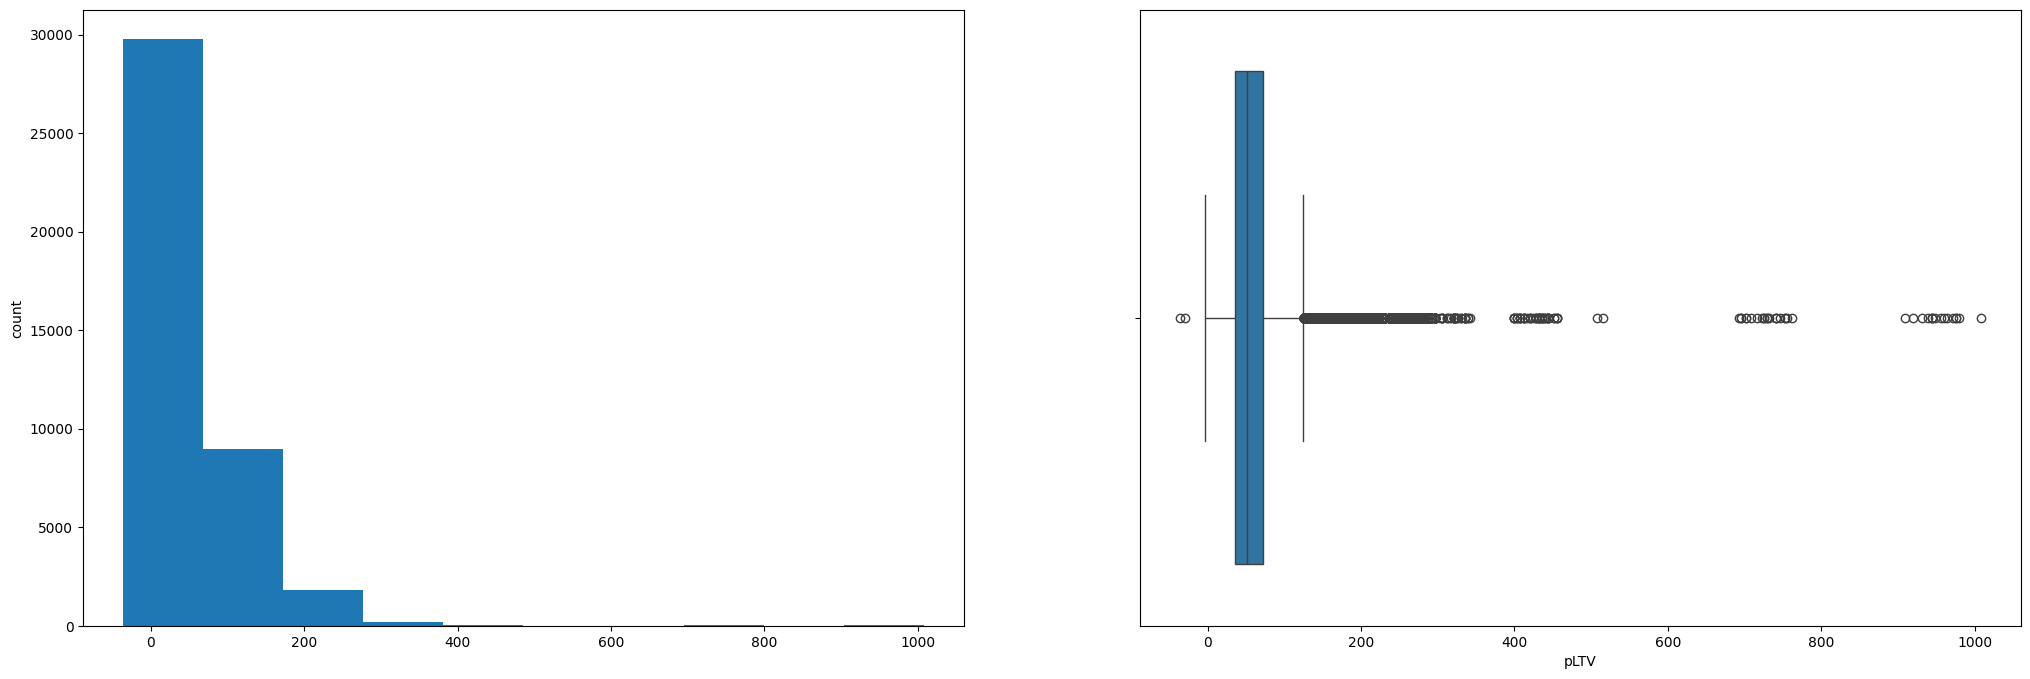

pages_viewed_before_purchase
Skew : 0.0


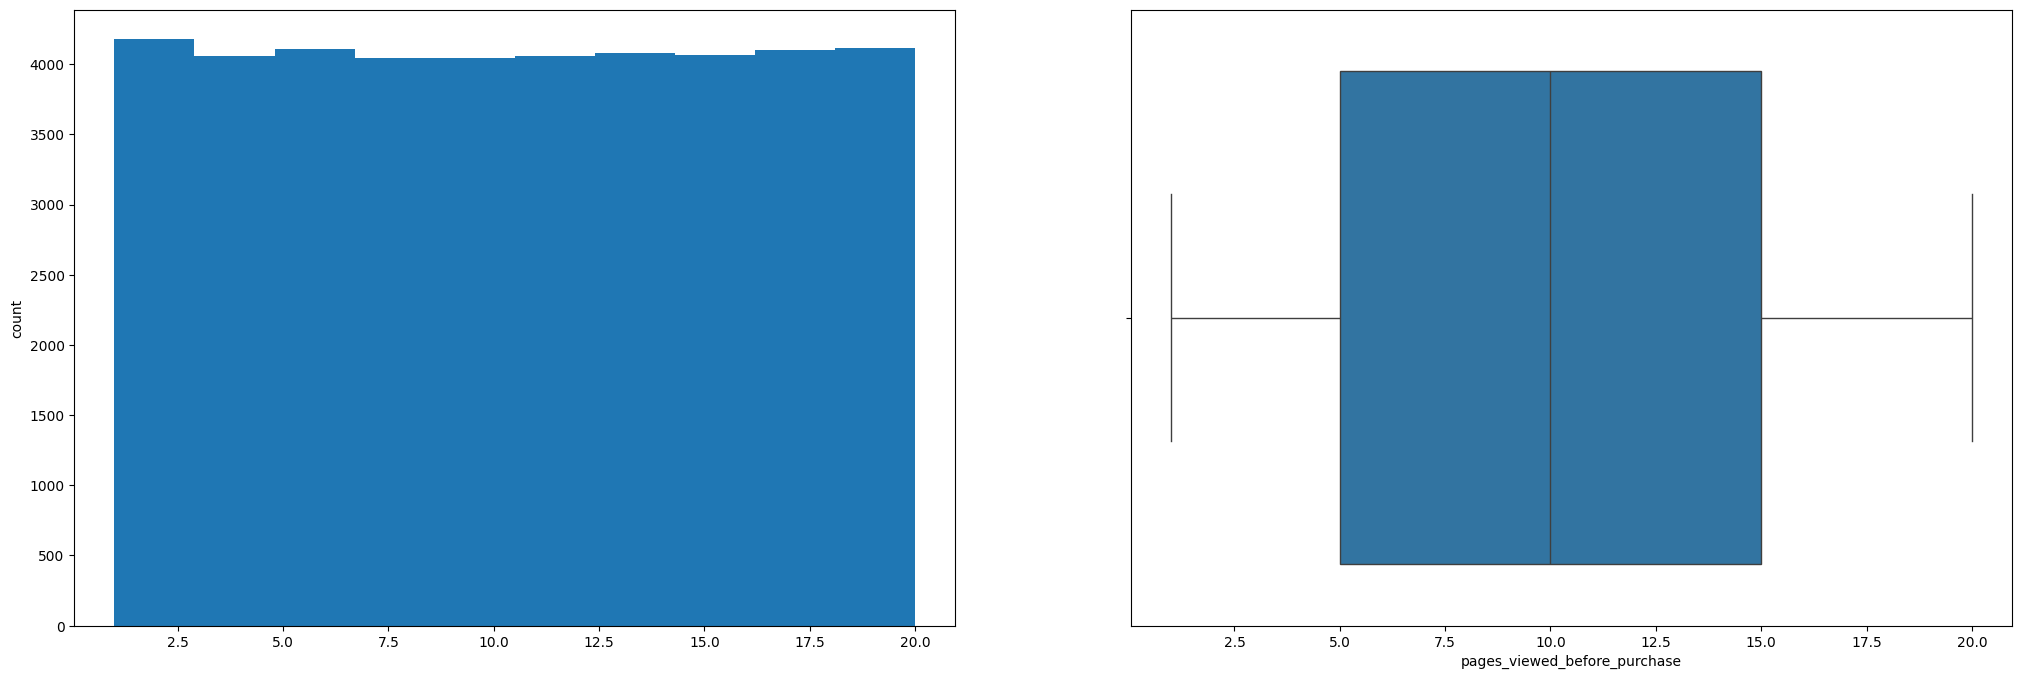

items_viewed_before_purchase
Skew : 1.66


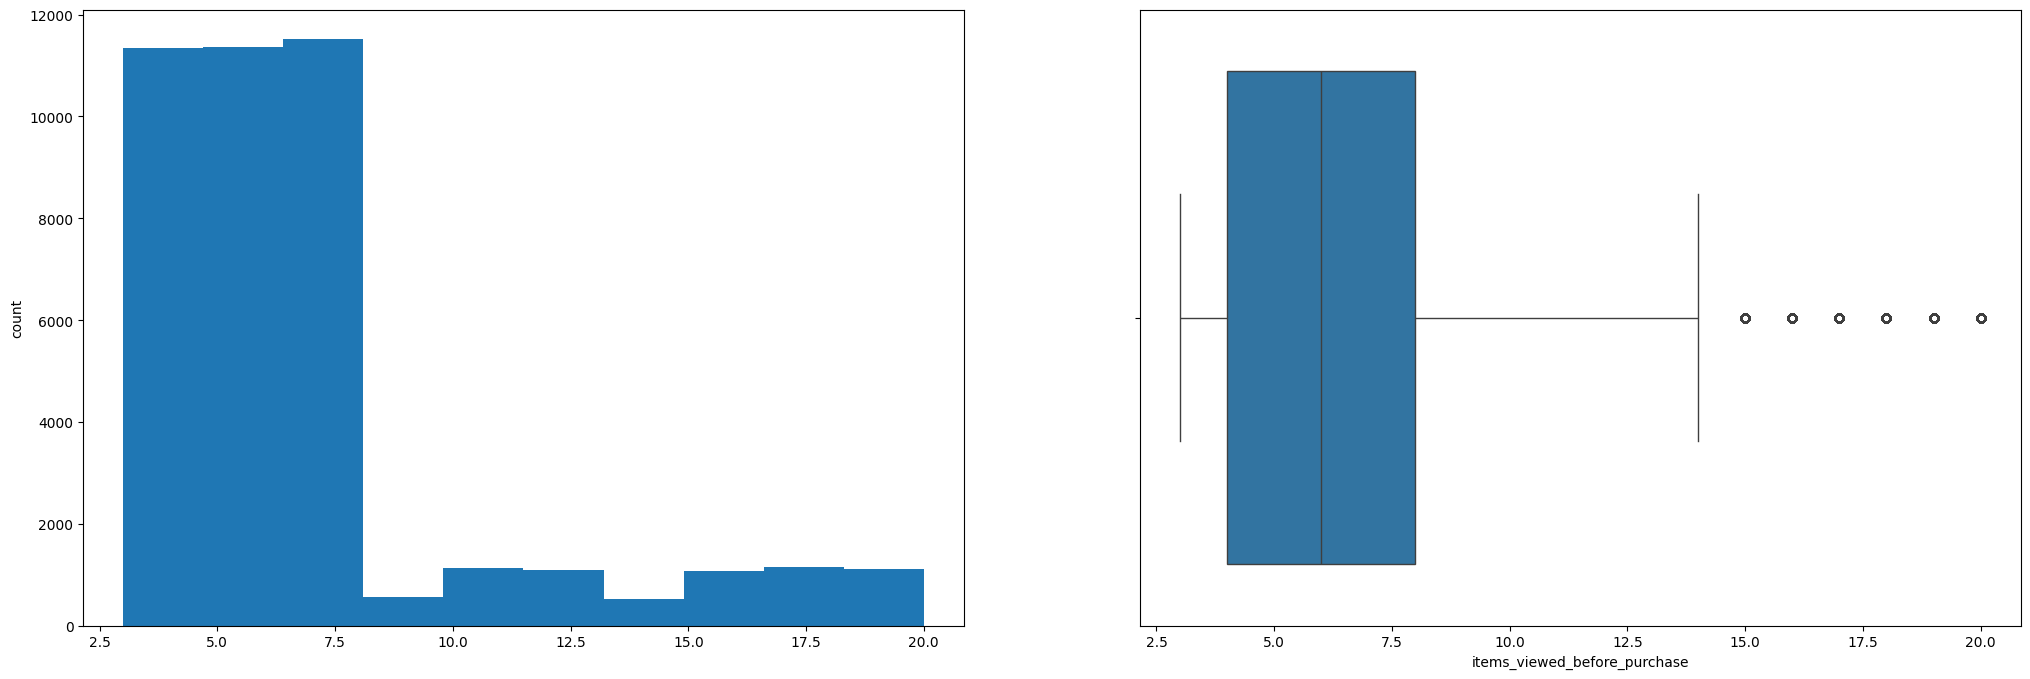

time_on_site_before_purchase
Skew : 2.0


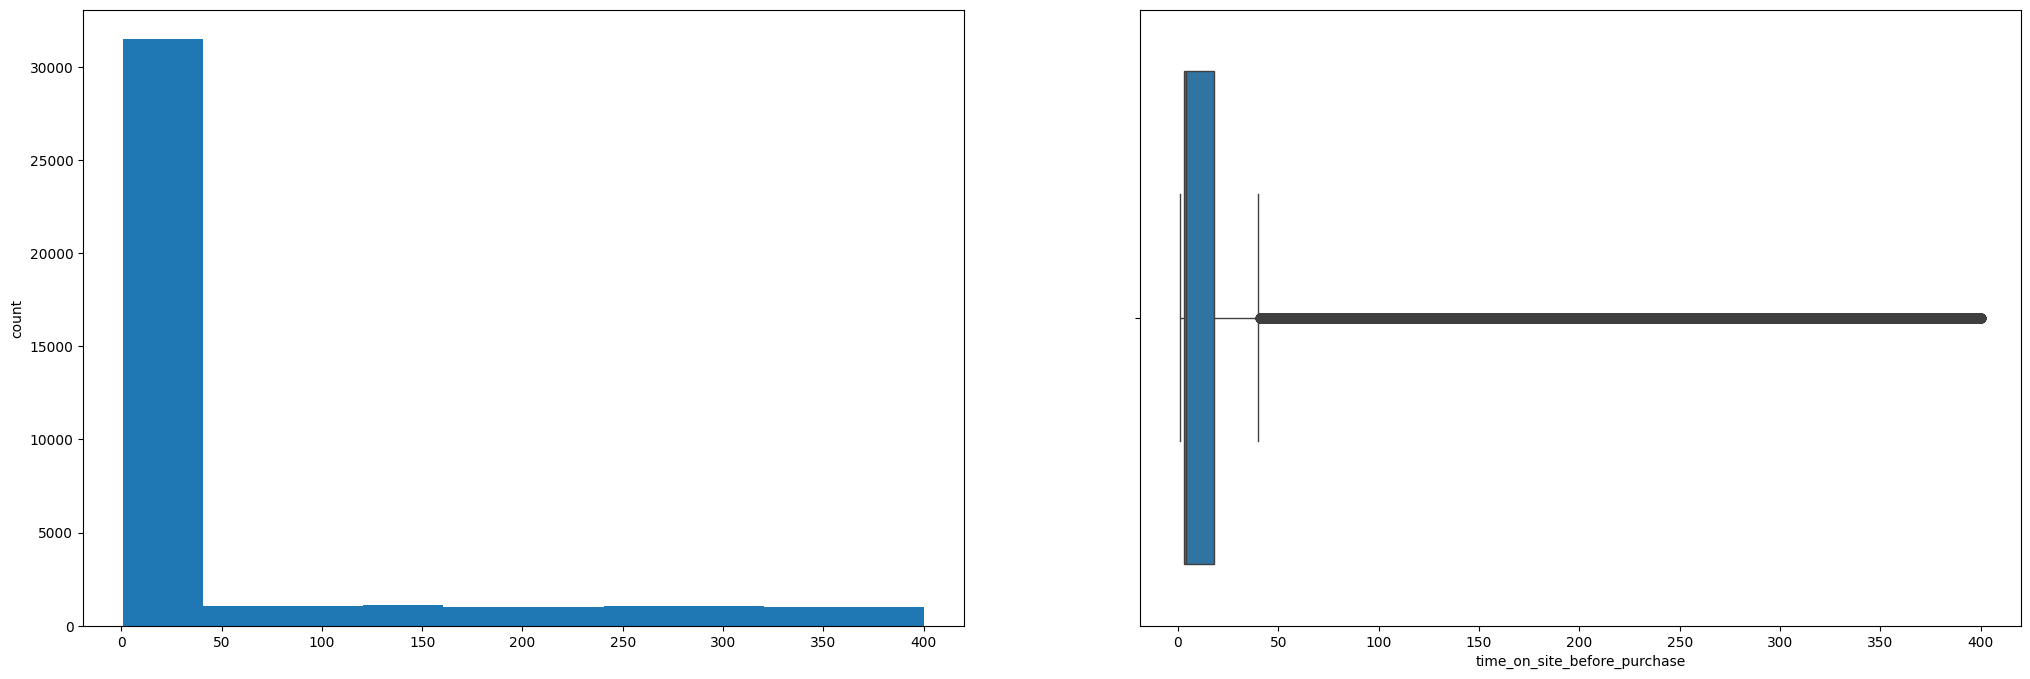

In [30]:
# Investigating summary stats on numerical columns
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (25, 8))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

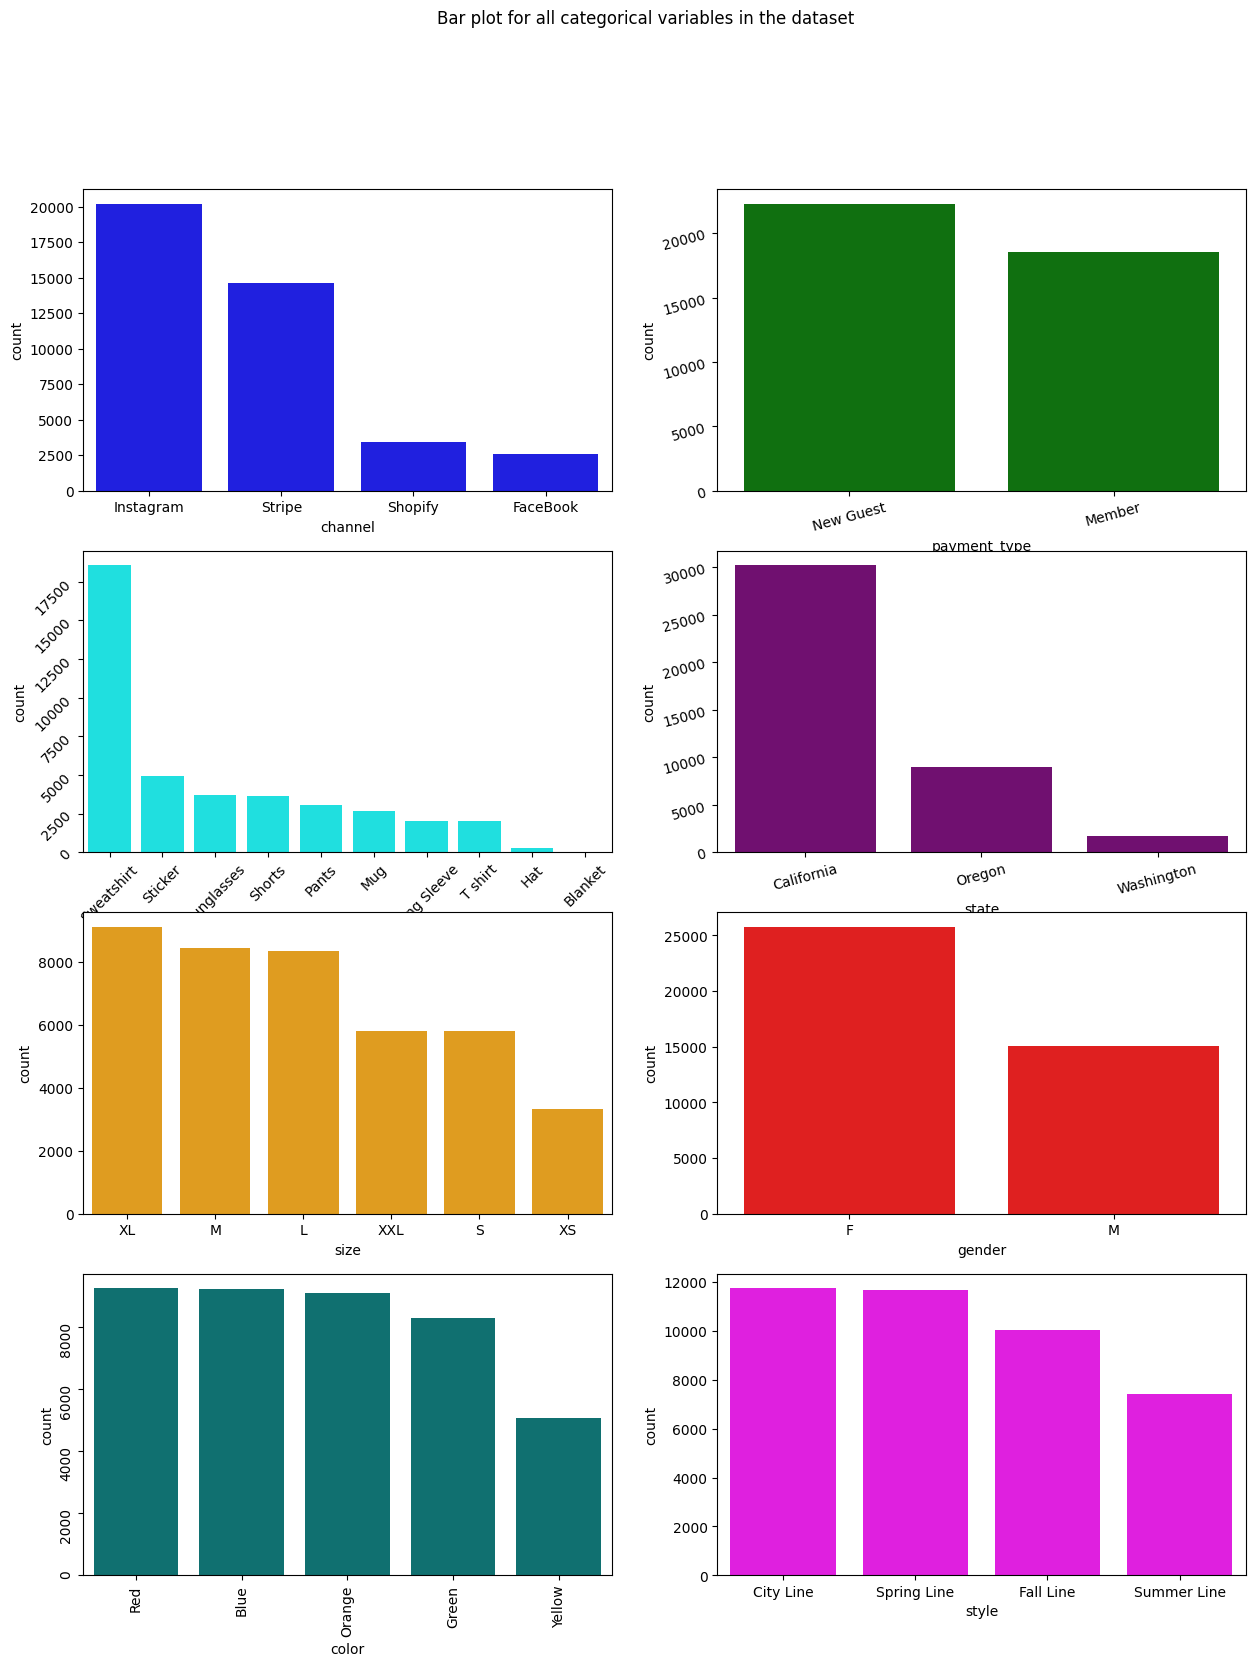

In [42]:
# Investigating summary stats on categorical columns
fig, axes = plt.subplots(4, 2, figsize = (15, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'channel', data = df, color = 'blue', 
              order = df['channel'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'payment_type', data = df, color = 'green', 
              order = df['payment_type'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'product', data = df, color = 'aqua', 
              order = df['product'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'state', data = df, color = 'purple', 
              order = df['state'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'size', data = df, color = 'orange', 
              order = df['size'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'gender', data = df, color = 'red', 
              order = df['gender'].value_counts().index);
sns.countplot(ax = axes[3, 0], x = 'color', data = df, color = 'teal', 
              order = df['color'].value_counts().index);
sns.countplot(ax = axes[3, 1], x = 'style', data = df, color = 'magenta', 
              order = df['style'].value_counts().index);
axes[0][1].tick_params(labelrotation=15);
axes[1][0].tick_params(labelrotation=45);
axes[1][1].tick_params(labelrotation=15);
axes[3][0].tick_params(labelrotation=90);

<Axes: xlabel='state', ylabel='amount_paid'>

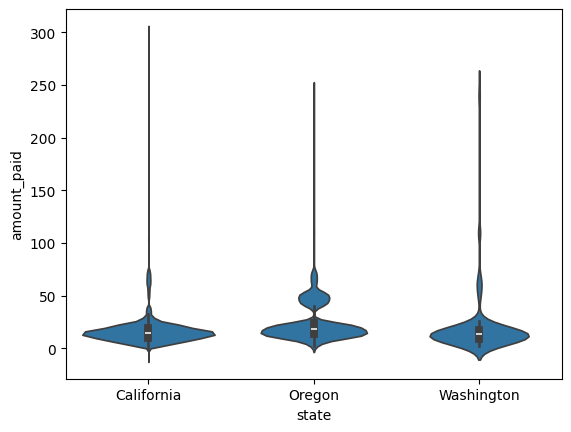

In [32]:
# Trying diff types of plots to find right visual

# sns.boxplot(x='state',y='amount_paid',data=df)
sns.violinplot(x="state", y="amount_paid", data=df)
# sns.stripplot(x="state", y="amount_paid", data=df)
# sns.swarmplot(x="state", y="amount_paid", data=df)

In [34]:
# Subselecting the integer columns to create a dataframe we can run a correlation heatmap on
integers = df[['amount_paid','days_since_registration','year','CAC','pLTV','pages_viewed_before_purchase','items_viewed_before_purchase','time_on_site_before_purchase']]
integers.corr()

,amount_paid,days_since_registration,year,CAC,pLTV,pages_viewed_before_purchase,items_viewed_before_purchase,time_on_site_before_purchase
amount_paid,1.000000,0.036702,0.000958,0.911731,0.975407,-0.001098,-0.279623,-0.327386
days_since_registration,0.036702,1.000000,-0.010480,0.032659,0.037286,-0.002369,-0.080165,-0.101701
year,0.000958,-0.010480,1.000000,-0.002871,-0.000702,-0.001993,0.000802,-0.000367
CAC,0.911731,0.032659,-0.002871,1.000000,0.889028,0.000265,-0.254795,-0.296584
pLTV,0.975407,0.037286,-0.000702,0.889028,1.000000,-0.000314,-0.282929,-0.332360
pages_viewed_before_purchase,-0.001098,-0.002369,-0.001993,0.000265,-0.000314,1.000000,0.003047,0.012003
items_viewed_before_purchase,-0.279623,-0.080165,0.000802,-0.254795,-0.282929,0.003047,1.000000,0.556337
time_on_site_before_purchase,-0.327386,-0.101701,-0.000367,-0.296584,-0.332360,0.012003,0.556337,1.000000


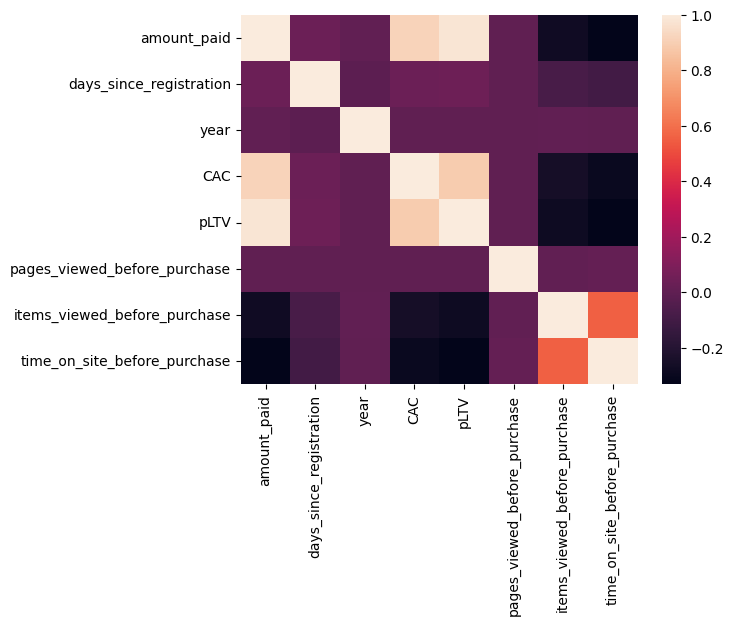

In [35]:
sns.heatmap(integers.corr());

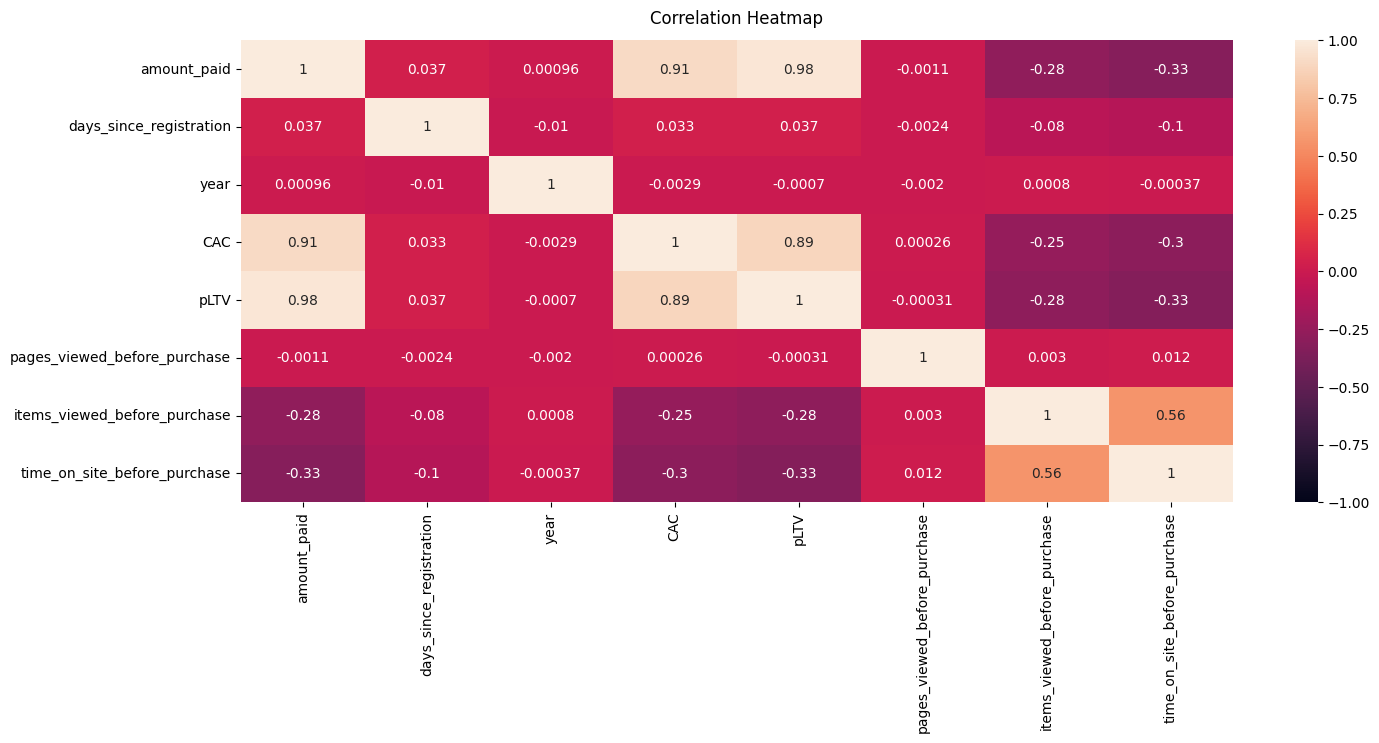

In [36]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(integers.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

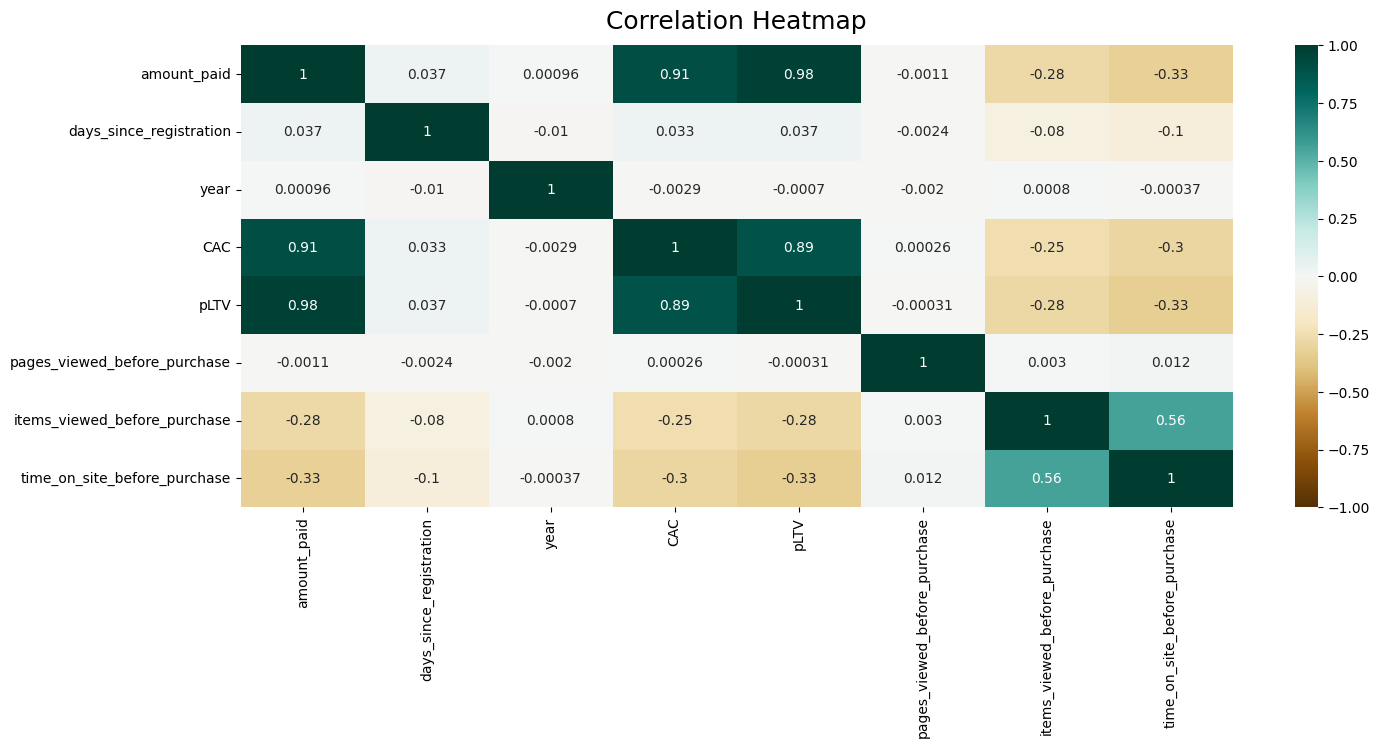

In [37]:
# Changing the color and font size for more effective visual
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(integers.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [38]:
# Creating a Mask 
## Requires a boolean array or a dataframe as an argument; when defined, cells become invisible for values where the mask is True

# The np.triu() numpy function isolates the upper triangle of a matrix while turning all the values in the lower triangle into 0. 
# The np.tril() function would do the same, only for the lower triangle. 
# Using the np.ones_like() function changes all the isolated values into 1.

# Example of how the data transforms
np.triu(np.ones_like(integers.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

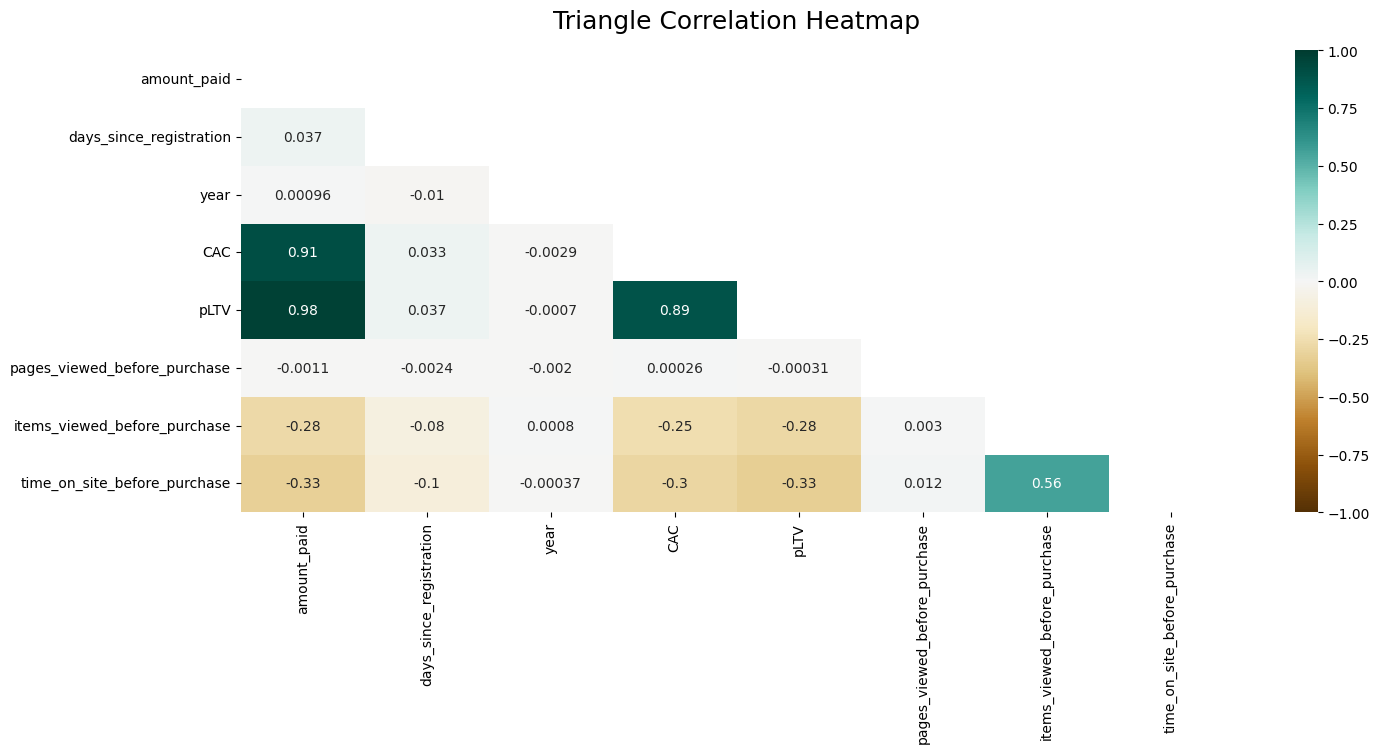

In [39]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(integers.corr(), dtype=np.bool))
heatmap = sns.heatmap(integers.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [40]:
# Selecting a specific column to see stacked rank of each value correlated to it

integers.corr()[['amount_paid']].sort_values(by='amount_paid', ascending=False)

,amount_paid
amount_paid,1.000000
pLTV,0.975407
CAC,0.911731
days_since_registration,0.036702
year,0.000958
pages_viewed_before_purchase,-0.001098
items_viewed_before_purchase,-0.279623
time_on_site_before_purchase,-0.327386


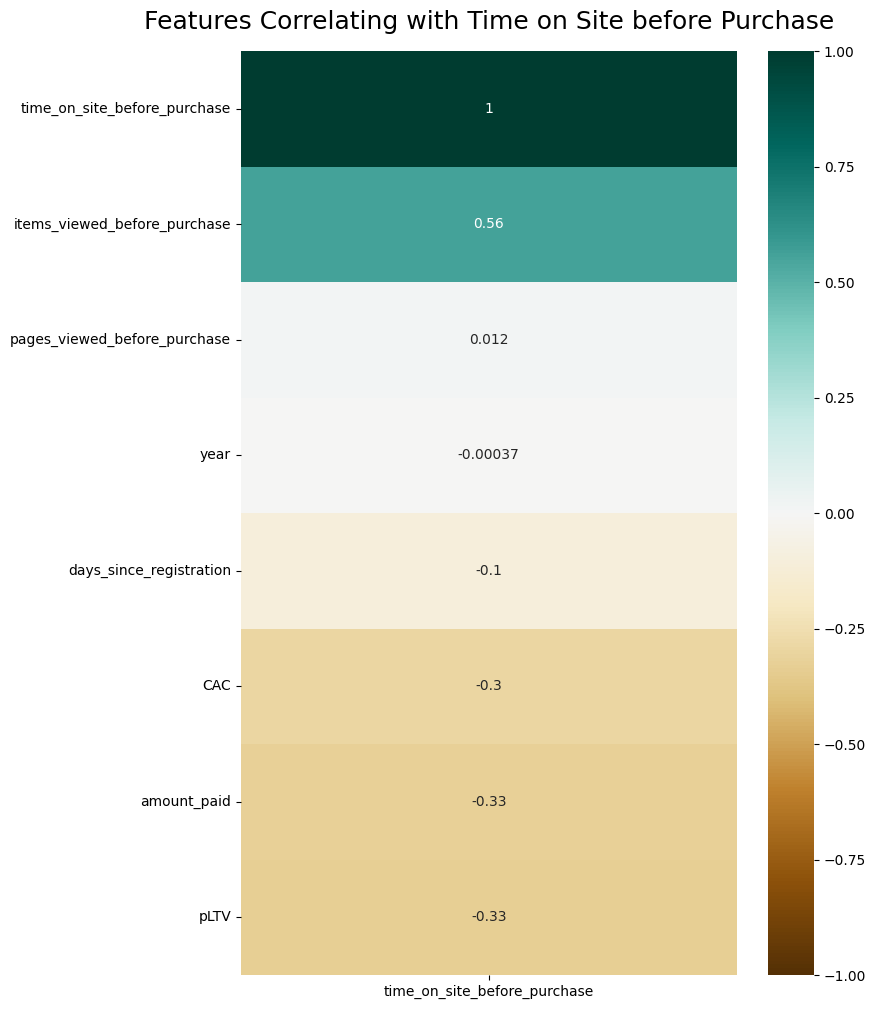

In [41]:
# Color coding our stack ranking based on the heatmapp function we used earlier for more effective visualization
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(integers.corr()[['time_on_site_before_purchase']].sort_values(by='time_on_site_before_purchase', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Time on Site before Purchase', fontdict={'fontsize':18}, pad=16);